In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset and check the nas

In [2]:
df=pd.read_csv('datasets_1067_1925_WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### Visualize categorical and numerical features

In [4]:
columns = df.columns

In [5]:
cat_columns = df.select_dtypes(include=['object']).columns

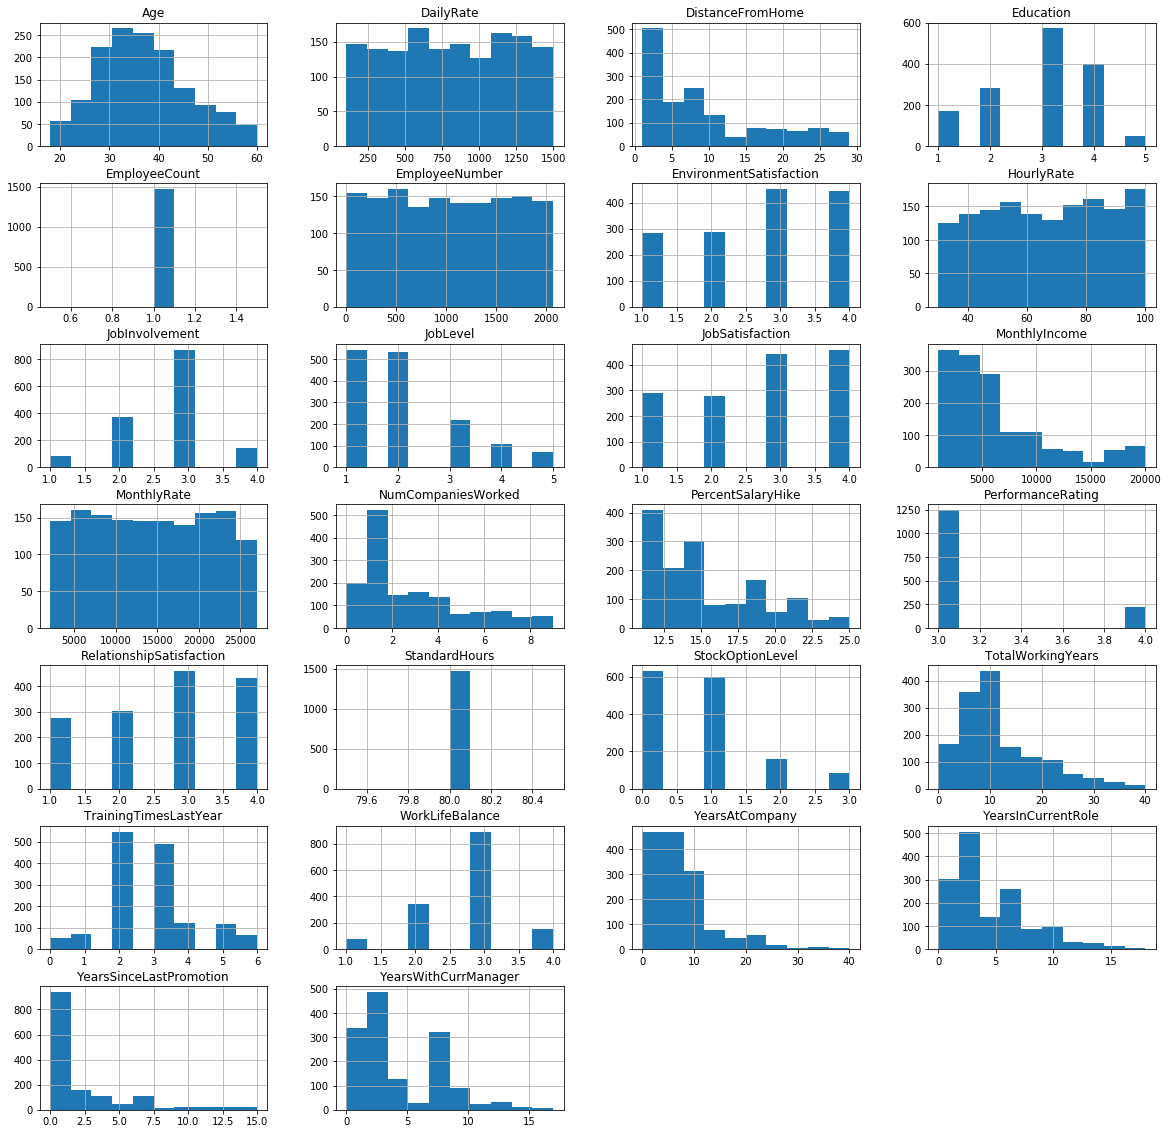

In [6]:
df[columns].hist(figsize=(20, 20), layout=(7, 4));

In [7]:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

['Travel_RarelyTravel_FrequentlyNon-Travel']

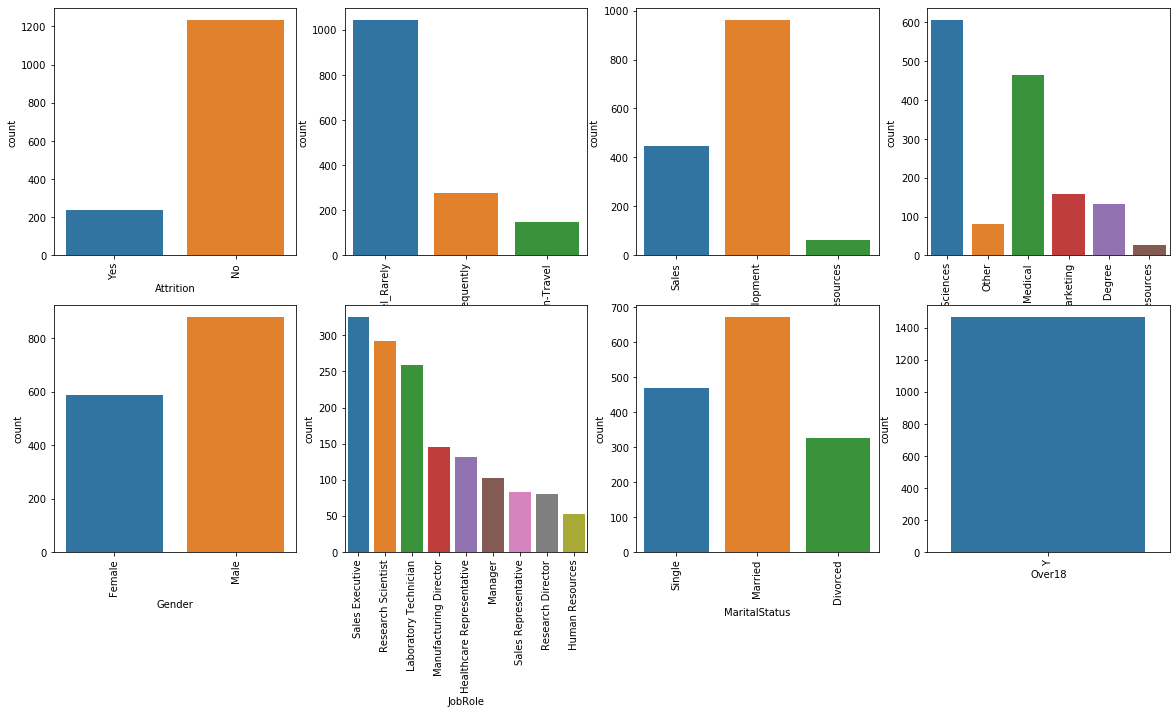

In [8]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cat_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Assign 0/1 to the binary categories and 0,1,2 to the categories that explain a degree of a certain amount (ex travlling rarely is 0 vs traveling often 2 )

In [9]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [10]:
df['BusinessTravel'] = df['BusinessTravel'].apply(lambda x: 0 if x=='Non-Travel' else 
                                                    (1 if x=='Travel_Rarely' else 2))

In [11]:
df['MaritalStatus'] = df['MaritalStatus'].apply(lambda x: 0 if x=='Single' else 
                                                    (1 if x=='Divorced' else 2))

In [12]:
df['MaritalStatus']= pd.to_numeric(df['MaritalStatus'], errors='coerce')
df['BusinessTravel']= pd.to_numeric(df['BusinessTravel'], errors='coerce')

### Correlation matrix 

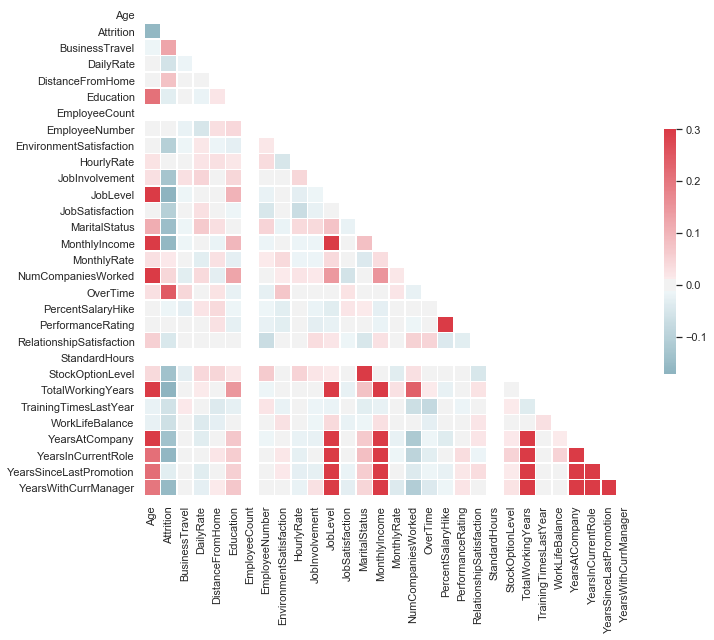

In [13]:
from string import ascii_letters


sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Drop the features that are the same for each entry

In [14]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis =1, inplace=True)

### Average out the satisfation columns into a single feature

In [15]:
df['satisfaction'] = (df['JobSatisfaction']+ df['EnvironmentSatisfaction']+ df['RelationshipSatisfaction'])/3

In [16]:
df.drop(['JobSatisfaction','EnvironmentSatisfaction','RelationshipSatisfaction','DailyRate','HourlyRate','YearsSinceLastPromotion'],axis =1, inplace=True)

In [17]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x =="Male" else 0 )

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
Age                      1470 non-null int64
Attrition                1470 non-null int64
BusinessTravel           1470 non-null int64
Department               1470 non-null object
DistanceFromHome         1470 non-null int64
Education                1470 non-null int64
EducationField           1470 non-null object
EmployeeNumber           1470 non-null int64
Gender                   1470 non-null int64
JobInvolvement           1470 non-null int64
JobLevel                 1470 non-null int64
JobRole                  1470 non-null object
MaritalStatus            1470 non-null int64
MonthlyIncome            1470 non-null int64
MonthlyRate              1470 non-null int64
NumCompaniesWorked       1470 non-null int64
OverTime                 1470 non-null int64
PercentSalaryHike        1470 non-null int64
PerformanceRating        1470 non-null int64
StockOptionLevel         1470 non-n

### Use dummy column to represent the remaining categorical variables 

In [19]:
#Mjob, Fjob, reason, guardian

pt_dummies = pd.get_dummies(df.Department)
dff = pd.concat([pt_dummies,df ], axis=1)

In [20]:
#Mjob, Fjob, reason, guardian

pt_dummies1 = pd.get_dummies(dff.EducationField)
dff1 = pd.concat([pt_dummies1,dff ], axis=1)

In [21]:
#Mjob, Fjob, reason, guardian

pt_dummies2 = pd.get_dummies(dff1.JobRole)
dff1 = pd.concat([pt_dummies2,dff1 ], axis=1)

In [22]:
dff1.head()

,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Human Resources,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,satisfaction
0,0,0,0,0,0,0,0,1,0,0,...,11,3,0,8,0,1,6,4,5,2.333333
1,0,0,0,0,0,0,1,0,0,0,...,23,4,1,10,3,3,10,7,7,3.000000
2,0,0,1,0,0,0,0,0,0,0,...,15,3,0,7,3,3,0,0,0,3.000000
3,0,0,0,0,0,0,1,0,0,0,...,11,3,0,8,3,3,8,7,0,3.333333
4,0,0,1,0,0,0,0,0,0,0,...,12,3,1,6,3,3,2,2,2,2.333333


In [23]:
y= dff1['Attrition'].values

In [24]:
dff1.drop(['Attrition','Healthcare Representative','Other','Sales','Department','EducationField','JobRole'],axis =1, inplace=True)

In [25]:
dff1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
Human Resources           1470 non-null uint8
Laboratory Technician     1470 non-null uint8
Manager                   1470 non-null uint8
Manufacturing Director    1470 non-null uint8
Research Director         1470 non-null uint8
Research Scientist        1470 non-null uint8
Sales Executive           1470 non-null uint8
Sales Representative      1470 non-null uint8
Human Resources           1470 non-null uint8
Life Sciences             1470 non-null uint8
Marketing                 1470 non-null uint8
Medical                   1470 non-null uint8
Technical Degree          1470 non-null uint8
Human Resources           1470 non-null uint8
Research & Development    1470 non-null uint8
Age                       1470 non-null int64
BusinessTravel            1470 non-null int64
DistanceFromHome          1470 non-null int64
Education                 1470 non-null int64
EmployeeNumber     

### Data preprocessing and train/test/validation split 

In [26]:
#from sklearn.preprocessing import StandardScaler


#Feature Scaling
from sklearn.preprocessing import StandardScaler

X = dff1
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.1, random_state=4)

### Use of SMOTE since the y output has a pretty unbalanced division between the classes 

In [33]:
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [34]:
sm = SMOTE(random_state=12, sampling_strategy=0.3)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

### Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression().fit(X_train_res,y_train_res)

In [36]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression().fit(X_train_res,y_train_res)

In [37]:
print('Validation Results')
print(LR_model.score(X_val, y_val))
print(recall_score(y_val, LR_model.predict(X_val)))
print('Test Results')
print(LR_model.score(X_test, y_test))
print(recall_score(y_test, LR_model.predict(X_test)))

Validation Results
0.8559322033898306
0.375
Test Results
0.8741496598639455
0.4358974358974359


Feature: 0, Score: 0.41093
Feature: 1, Score: 0.90104
Feature: 2, Score: -0.20002
Feature: 3, Score: 0.22306
Feature: 4, Score: -0.28508
Feature: 5, Score: 0.42213
Feature: 6, Score: 0.55834
Feature: 7, Score: 0.60101
Feature: 8, Score: 0.18079
Feature: 9, Score: 0.03432
Feature: 10, Score: 0.12397
Feature: 11, Score: -0.00585
Feature: 12, Score: 0.31727
Feature: 13, Score: -0.28878
Feature: 14, Score: -0.11502
Feature: 15, Score: -0.22386
Feature: 16, Score: 0.53078
Feature: 17, Score: 0.31357
Feature: 18, Score: 0.22266
Feature: 19, Score: -0.01278
Feature: 20, Score: 0.29317
Feature: 21, Score: -0.35318
Feature: 22, Score: -0.23537
Feature: 23, Score: -0.40258
Feature: 24, Score: 0.60678
Feature: 25, Score: 0.14769
Feature: 26, Score: 0.51067
Feature: 27, Score: 0.99764
Feature: 28, Score: -0.02062
Feature: 29, Score: -0.10767
Feature: 30, Score: -0.34151
Feature: 31, Score: -0.59043
Feature: 32, Score: -0.19412
Feature: 33, Score: -0.28489
Feature: 34, Score: 0.82004
Feature: 35, S

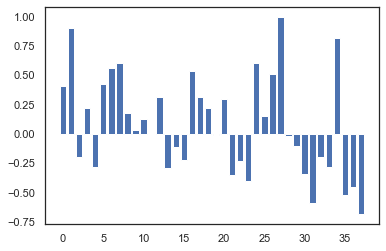

In [38]:
# get importance
from matplotlib import pyplot

importance = LR_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [39]:
# The estimated coefficients will all be around 1:
print(LR_model.coef_)

# Those values, however, will show that the second parameter
# is more influential
#print(np.std(X, 0)*LRmodel.coef_)

[[ 0.41093218  0.90103583 -0.20001736  0.22306407 -0.28508093  0.42212894
   0.55834332  0.60101431  0.18079267  0.03432246  0.12397056 -0.00584696
   0.31727135 -0.28877966 -0.11502274 -0.22385877  0.53078316  0.313567
   0.22265601 -0.01277967  0.29316794 -0.35317704 -0.23536769 -0.4025845
   0.60678004  0.14768678  0.5106708   0.99764472 -0.02061788 -0.10766766
  -0.34150659 -0.590434   -0.19412187 -0.28489378  0.82004024 -0.52327718
  -0.45599107 -0.6878385 ]]


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [41]:
print('Validation Results')
print(RF.score(X_val, y_val))
print(recall_score(y_val, RF.predict(X_val)))
print('Test Results')
print(RF.score(X_test, y_test))
print(recall_score(y_test, RF.predict(X_test)))

Validation Results
0.8728813559322034
0.1875
Test Results
0.8809523809523809
0.1282051282051282


In [42]:
grid_params20 = {'criterion': ['gini','entropy'], 'n_estimators': [10,20,50], 'max_depth' : [5,6,7,8,9,10]}

In [43]:
gs20 = GridSearchCV(RandomForestClassifier(),grid_params20,cv=10)

In [44]:
gs20_results = gs20.fit(X_train_res,y_train_res)

In [46]:
gs20_results.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}

In [47]:
RF_model =RandomForestClassifier(criterion = 'gini', max_depth=10, n_estimators = 50)
RF_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [48]:
print('Validation Results')
print(RF_model.score(X_val, y_val))
print(recall_score(y_val, RF_model.predict(X_val)))
print('Test Results')
print(RF.score(X_test, y_test))
print(recall_score(y_test, RF_model.predict(X_test)))

Validation Results
0.8813559322033898
0.1875
Test Results
0.8809523809523809
0.10256410256410256


Feature ranking:
1. feature 27 (0.089397)
2. feature 24 (0.071335)
3. feature 37 (0.056834)
4. feature 15 (0.052538)
5. feature 34 (0.051678)
6. feature 31 (0.047530)
7. feature 19 (0.045586)
8. feature 30 (0.044984)
9. feature 25 (0.044557)
10. feature 17 (0.041760)
11. feature 35 (0.039539)
12. feature 36 (0.037368)
13. feature 26 (0.036552)
14. feature 22 (0.034312)
15. feature 28 (0.032658)
16. feature 23 (0.032232)
17. feature 32 (0.029415)
18. feature 33 (0.024914)
19. feature 16 (0.023819)
20. feature 18 (0.022866)
21. feature 21 (0.022832)
22. feature 6 (0.013117)
23. feature 20 (0.012570)
24. feature 14 (0.011663)
25. feature 1 (0.011530)
26. feature 9 (0.009969)
27. feature 11 (0.009484)
28. feature 7 (0.008768)
29. feature 10 (0.008672)
30. feature 5 (0.007852)
31. feature 12 (0.007068)
32. feature 29 (0.004265)
33. feature 3 (0.004061)
34. feature 0 (0.002418)
35. feature 13 (0.001829)
36. feature 2 (0.001374)
37. feature 8 (0.001355)
38. feature 4 (0.001299)


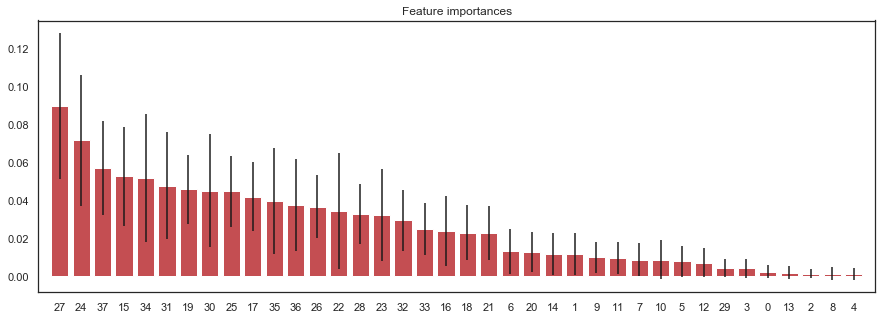

In [49]:
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### XG boost

In [50]:
import xgboost as xgb

In [51]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', seed=42)
eval_set = [(X_train_res,y_train_res), (X_val, y_val)]
xg_reg.fit(X_train_res,y_train_res,early_stopping_rounds=45, eval_metric=['auc','logloss'],eval_set=eval_set, verbose=True )

[0]	validation_0-auc:0.89627	validation_0-logloss:0.52326	validation_1-auc:0.64430	validation_1-logloss:0.56316
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 45 rounds.
[1]	validation_0-auc:0.93194	validation_0-logloss:0.42479	validation_1-auc:0.75031	validation_1-logloss:0.48078
[2]	validation_0-auc:0.95929	validation_0-logloss:0.35075	validation_1-auc:0.74877	validation_1-logloss:0.44355
[3]	validation_0-auc:0.96716	validation_0-logloss:0.30291	validation_1-auc:0.76899	validation_1-logloss:0.40376
[4]	validation_0-auc:0.97747	validation_0-logloss:0.26641	validation_1-auc:0.75858	validation_1-logloss:0.38756
[5]	validation_0-auc:0.98269	validation_0-logloss:0.23614	validation_1-auc:0.73346	validation_1-logloss:0.38106
[6]	validation_0-auc:0.98643	validation_0-logloss:0.21401	validation_1-auc:0.73774	validation_1-logloss:0.37105
[7]	validation_0-auc:0.99015	validation_0-logloss:0

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [52]:
#Choose all predictors except target & IDcols
#predictors = [x for x in X_train_res.columns if x not in [target, IDcol]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.3,
 n_estimators=100,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=1,
 colsample_bytree=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=1, tree_method=None, validate_parameters=False,
              verbosity=None)

In [53]:
print('Validation Results')
print(xgb1.score(X_val, y_val))
print(recall_score(y_val, xgb1.predict(X_val)))
print('Test Results')
print(xgb1.score(X_test, y_test))
print(recall_score(y_test, xgb1.predict(X_test)))

Validation Results
0.8728813559322034
0.3125
Test Results
0.8707482993197279
0.3076923076923077


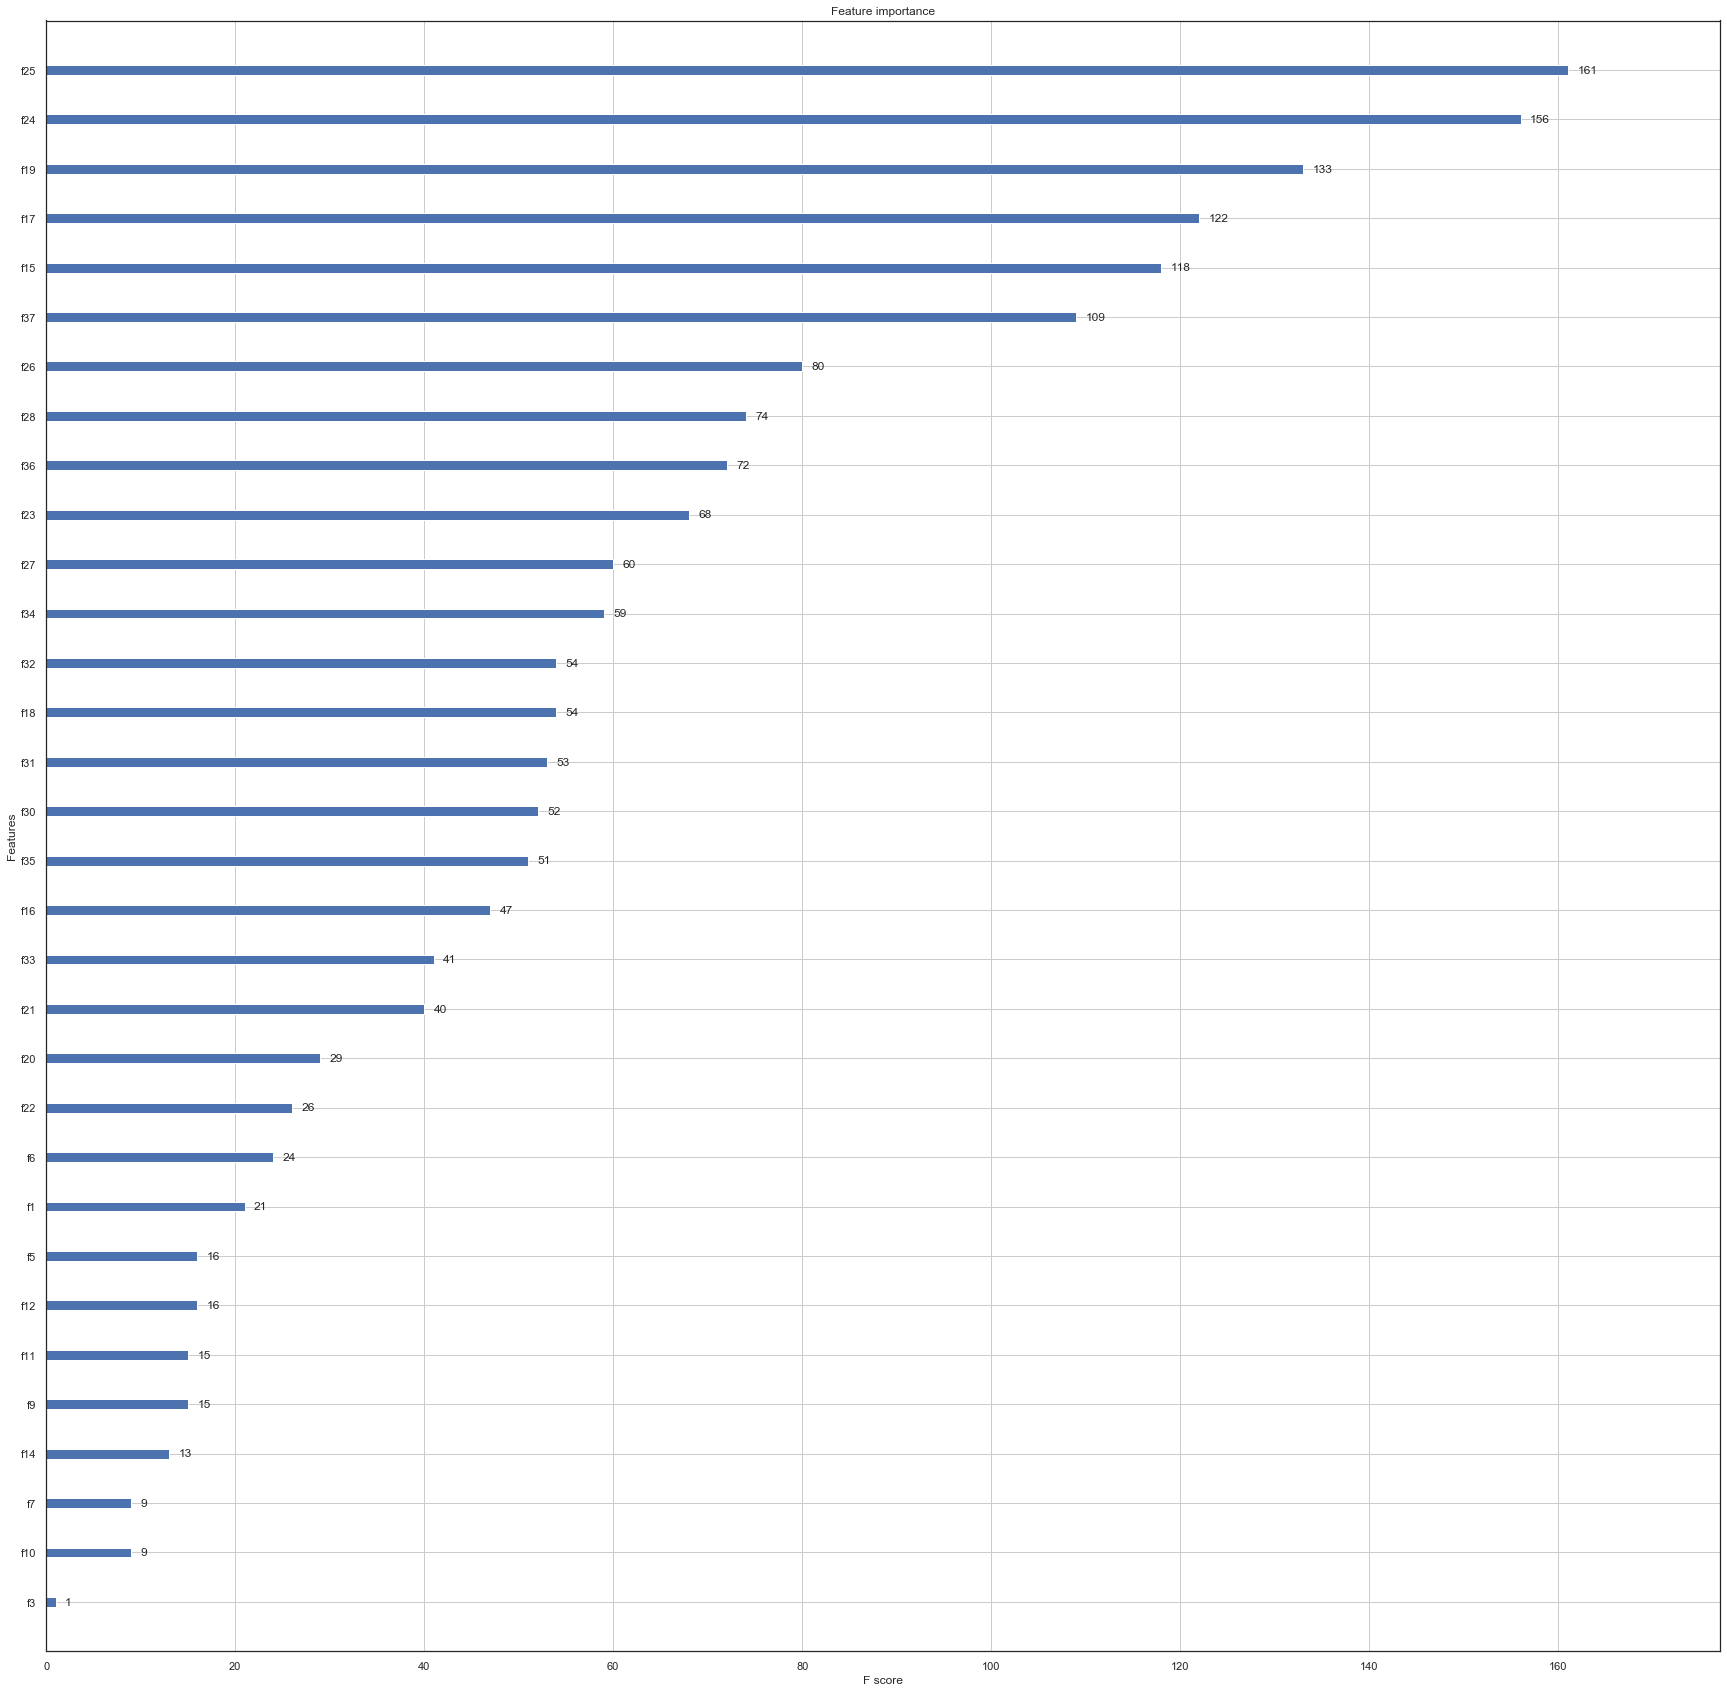

In [55]:
xgb.plot_importance(xgb1)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

In [57]:
from sklearn.decomposition import PCA
pca_cc = PCA(n_components=5)
principalComponents_cc = pca_cc.fit_transform(X)

In [59]:
principal_cc_Df = pd.DataFrame(data = principalComponents_cc
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4', 'principal component 5'])

In [60]:
print('Explained variation per principal component: {}'.format(pca_cc.explained_variance_ratio_))

Explained variation per principal component: [0.13173512 0.07366579 0.06204781 0.04775741 0.0460637 ]


In [61]:
sum(pca_cc.explained_variance_ratio_)

0.3612698356471111